# Projet 4 - Segmentez des clients d'un site e-commerce

## Analyse exploratoire et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.

In [1]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data\customer_segments3_202409201627.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97078 entries, 0 to 97077
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         97078 non-null  object 
 1   total_orders               97078 non-null  int64  
 2   avg_delivery_time_days     94892 non-null  float64
 3   last_order_date            97078 non-null  object 
 4   days_since_last_order      97078 non-null  float64
 5   total_spent                97078 non-null  float64
 6   avg_review_score           96353 non-null  float64
 7   avg_delivery_delay_days    97078 non-null  float64
 8   max_delivery_delay_days    97078 non-null  float64
 9   last_order_status          97078 non-null  object 
 10  has_comment                97078 non-null  int64  
 11  last_payment_type          97077 non-null  object 
 12  last_payment_installments  97077 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usag

Le jeu initial de données contient 3376 observations réparties en 46 colonnes/variables.

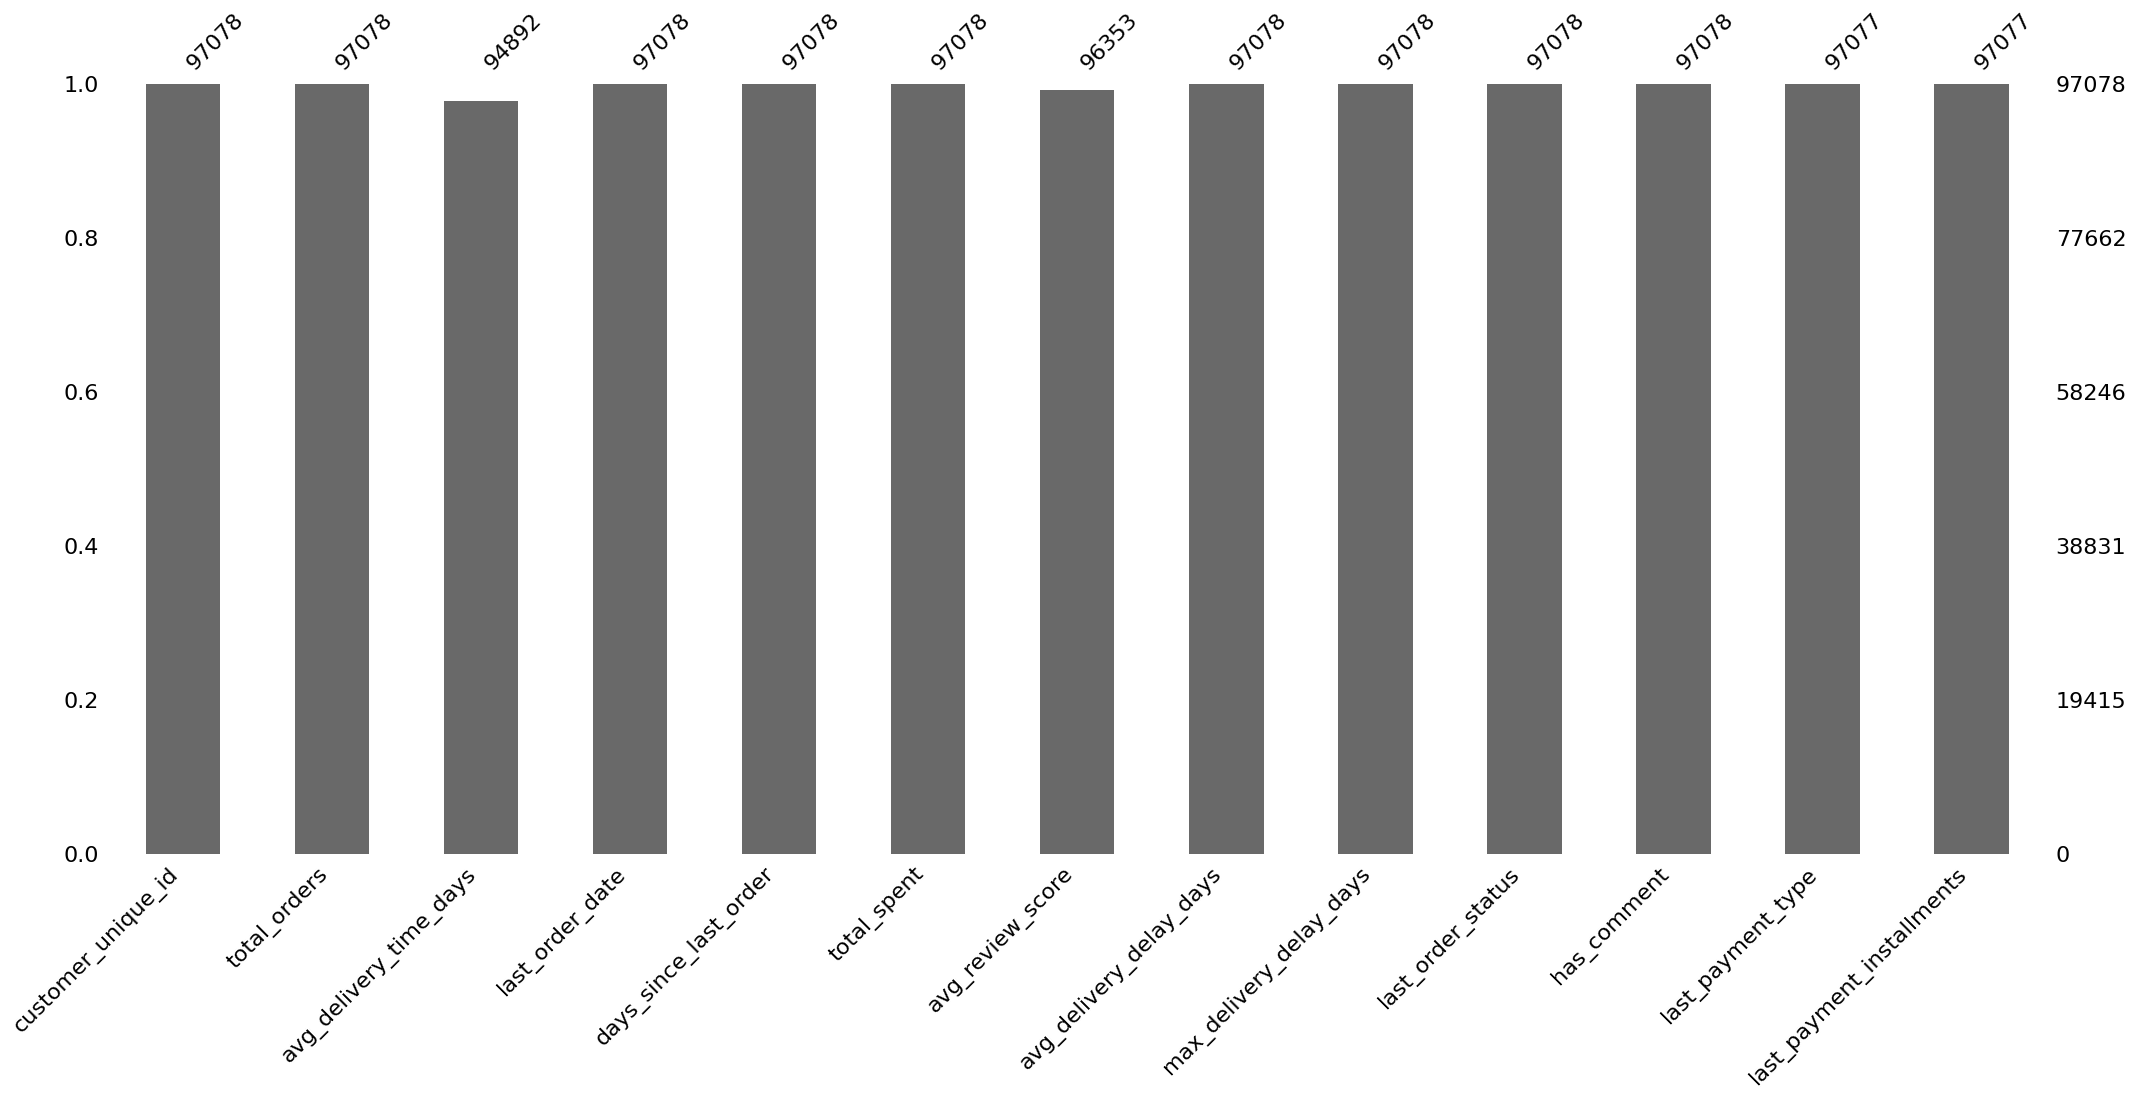

In [4]:
DataAnalysis.show_columns_population(df, type='bar')

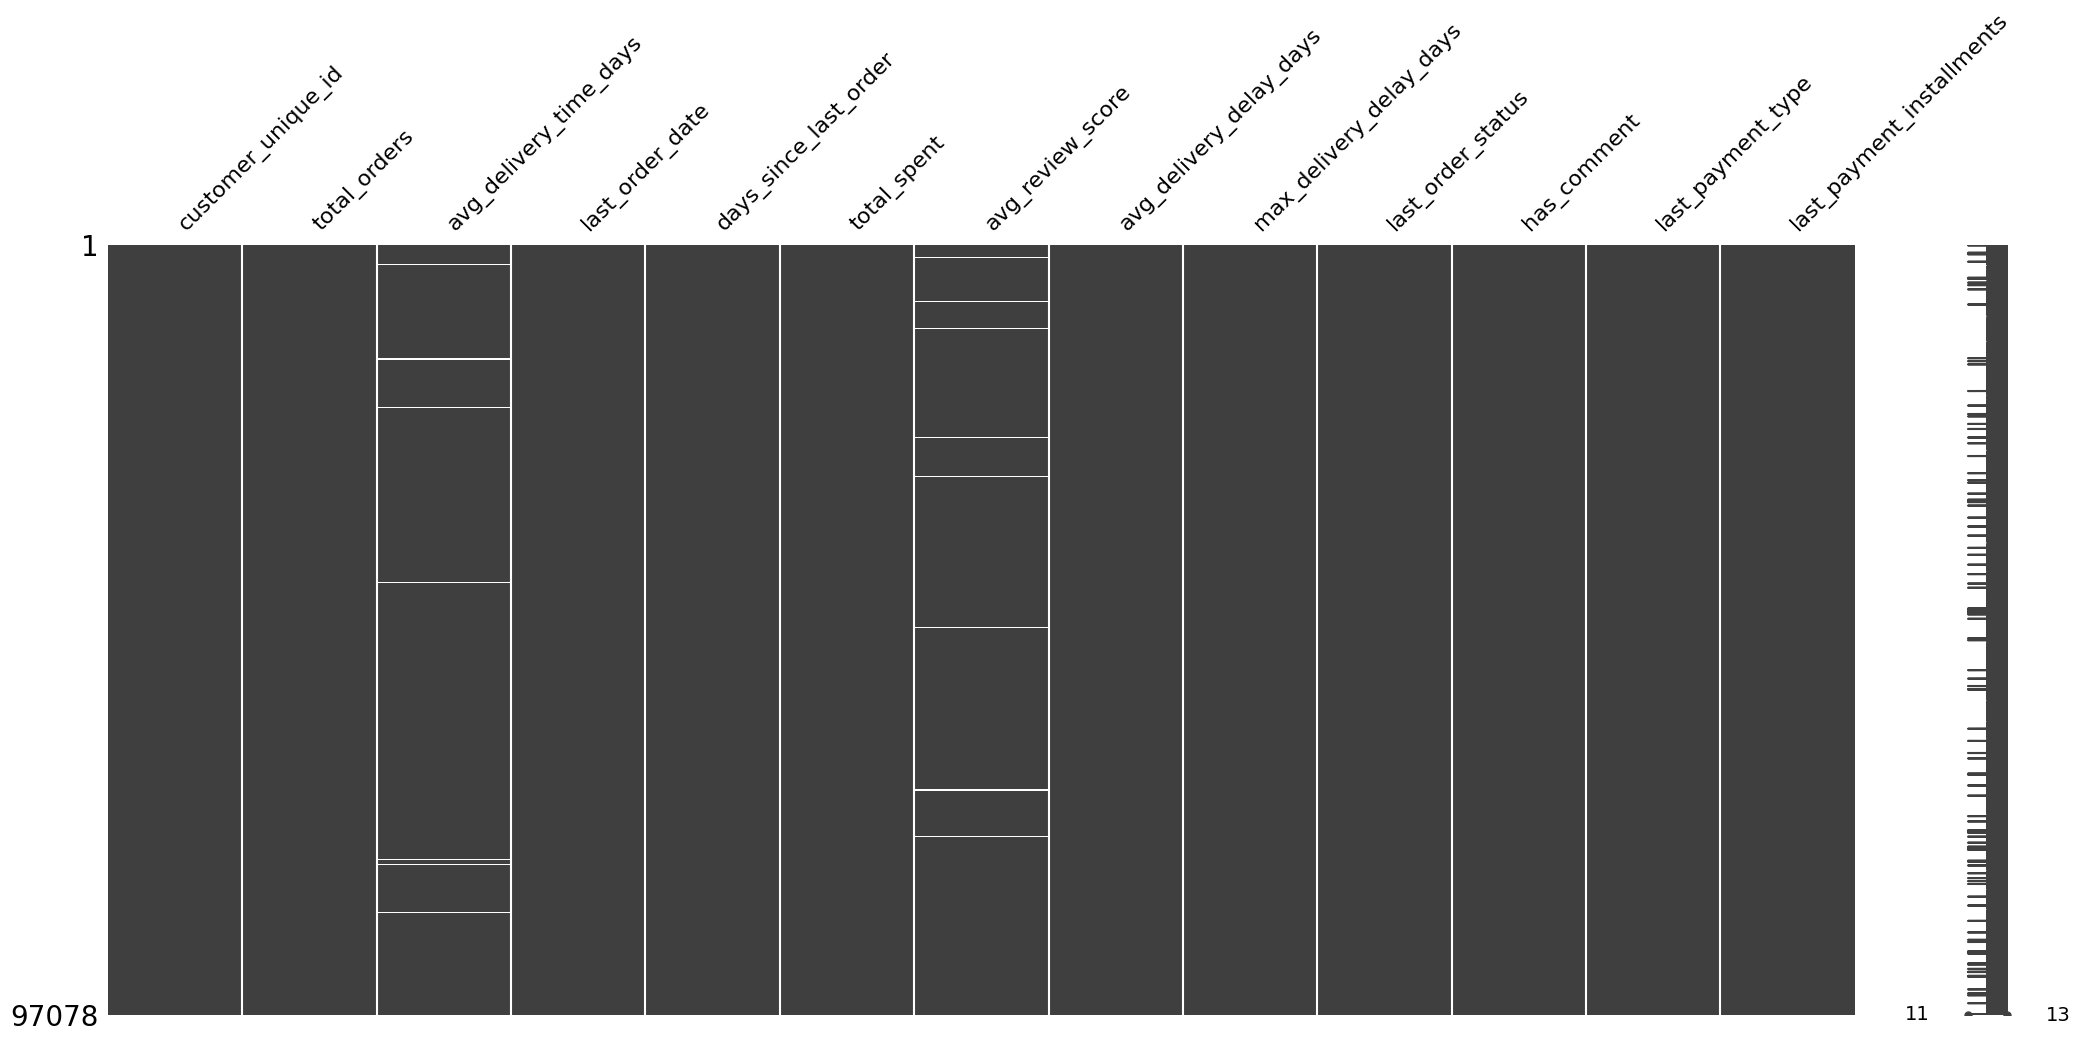

In [5]:
DataAnalysis.show_columns_population(df, type='matrix')

In [6]:
# On supprime la colonne "last_order_date" car elle ne nous sera pas utile, nous avons déjà la colonne "days_since_last_order"
df = df.drop(columns=['last_order_date'])



In [7]:
# on supprime les observations avec des valeurs manquantes
df = df.dropna()

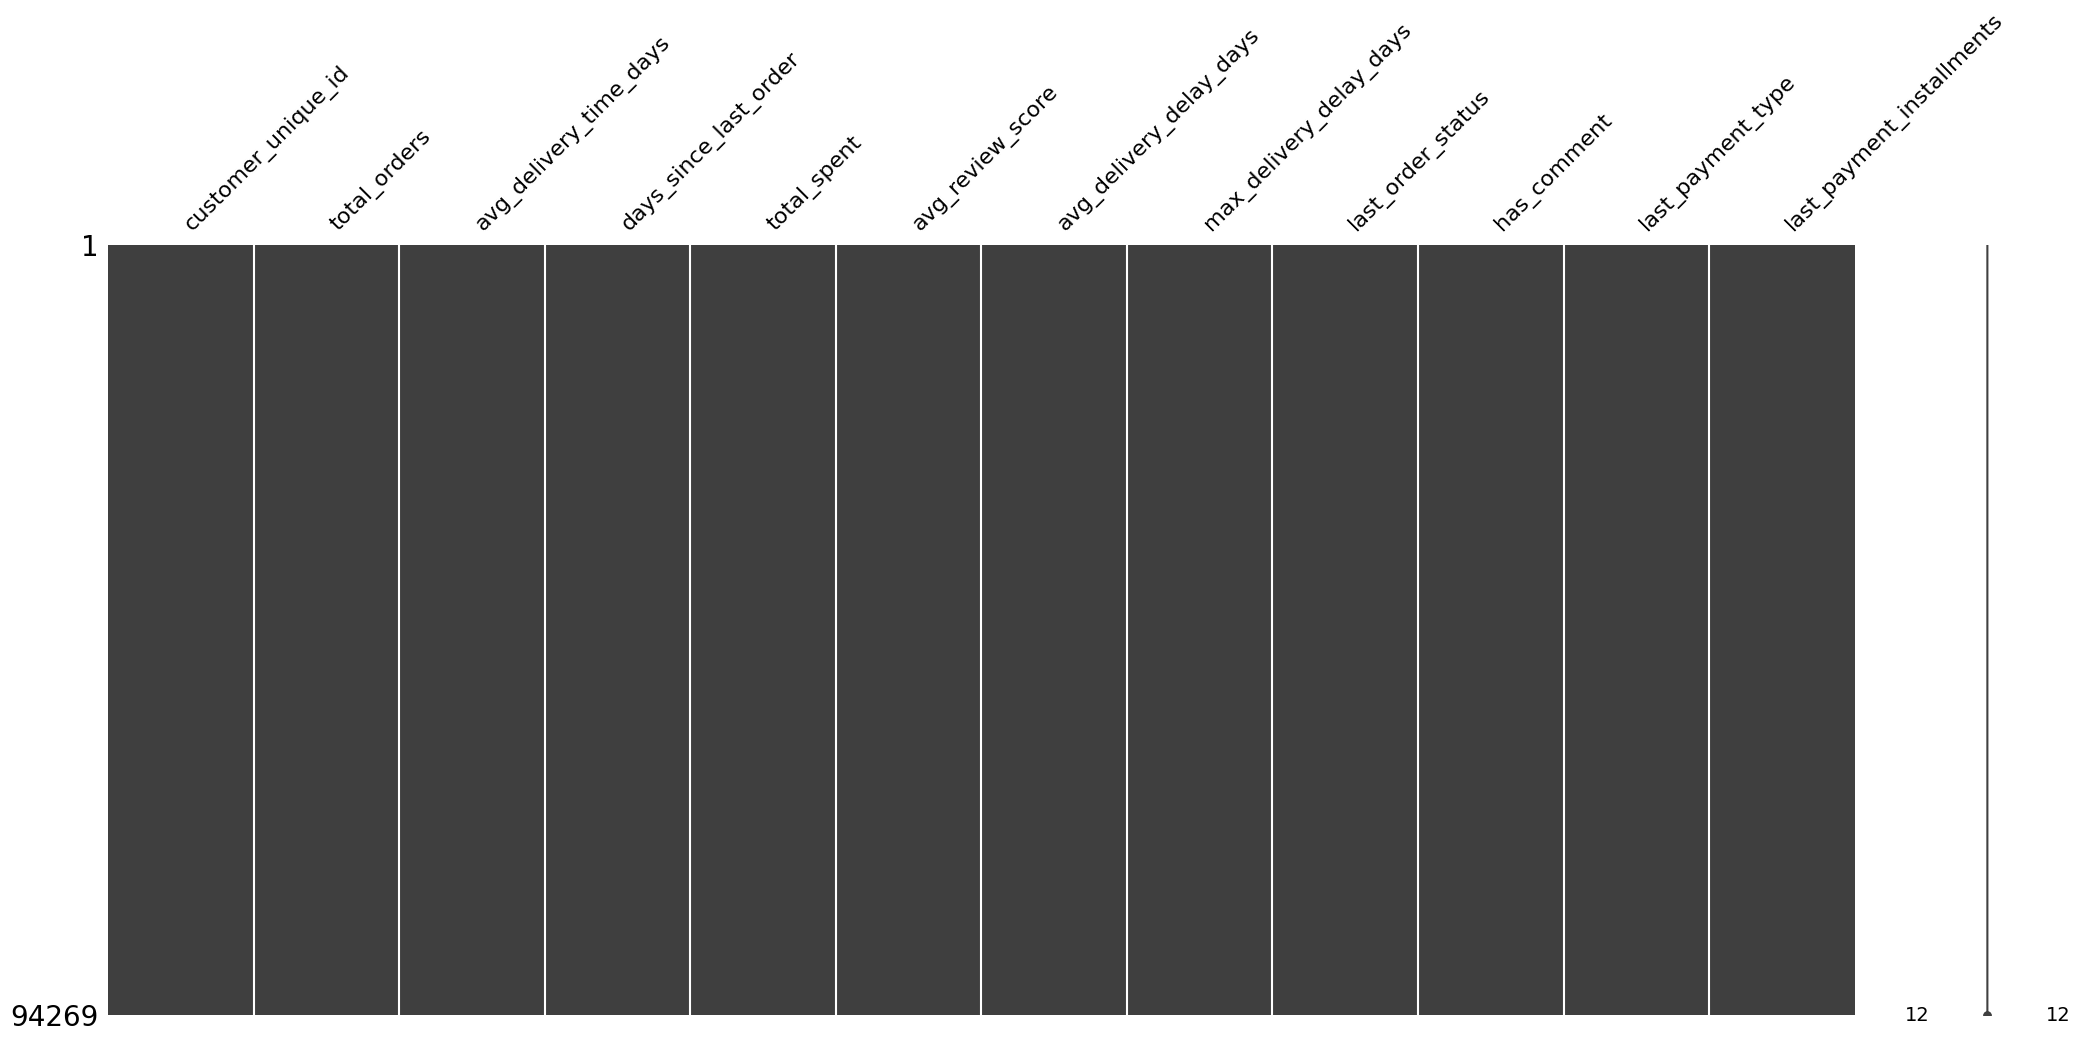

In [8]:
DataAnalysis.show_columns_population(df, type='matrix')

## Nous avons 94269 observations utilisables correspondant chacun à un client unique et leurs habitudes d'achat.

In [9]:
df.describe()

,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,has_comment,last_payment_installments
count,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000,94269.000000
mean,1.016739,12.519144,287.770761,162.969419,4.155474,0.757350,0.765609,0.408119,2.928248
std,0.142699,9.462724,152.802708,223.318382,1.282087,4.673798,4.695404,0.491488,2.708299
min,1.000000,0.533414,49.145613,9.590000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.765856,163.737350,62.540000,4.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,10.210301,268.780012,106.720000,5.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,15.671852,397.218368,179.340000,5.000000,0.000000,0.000000,1.000000,4.000000
max,11.000000,208.351759,744.364907,13664.080000,5.000000,188.975081,188.975081,1.000000,24.000000


### L'analyse des valeurs numériques permet d'observer qu'il ne semble pas y avoir de valeur aberrante. Les données semblent cohérentes.

In [10]:
# On liste les colonnes qui ont des valeurs de type number
df.select_dtypes(include=['number']).columns

Index(['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score', 'avg_delivery_delay_days',
       'max_delivery_delay_days', 'has_comment', 'last_payment_installments'],
      dtype='object')

## Analyse des colonnes de type number et valeurs aberrantes

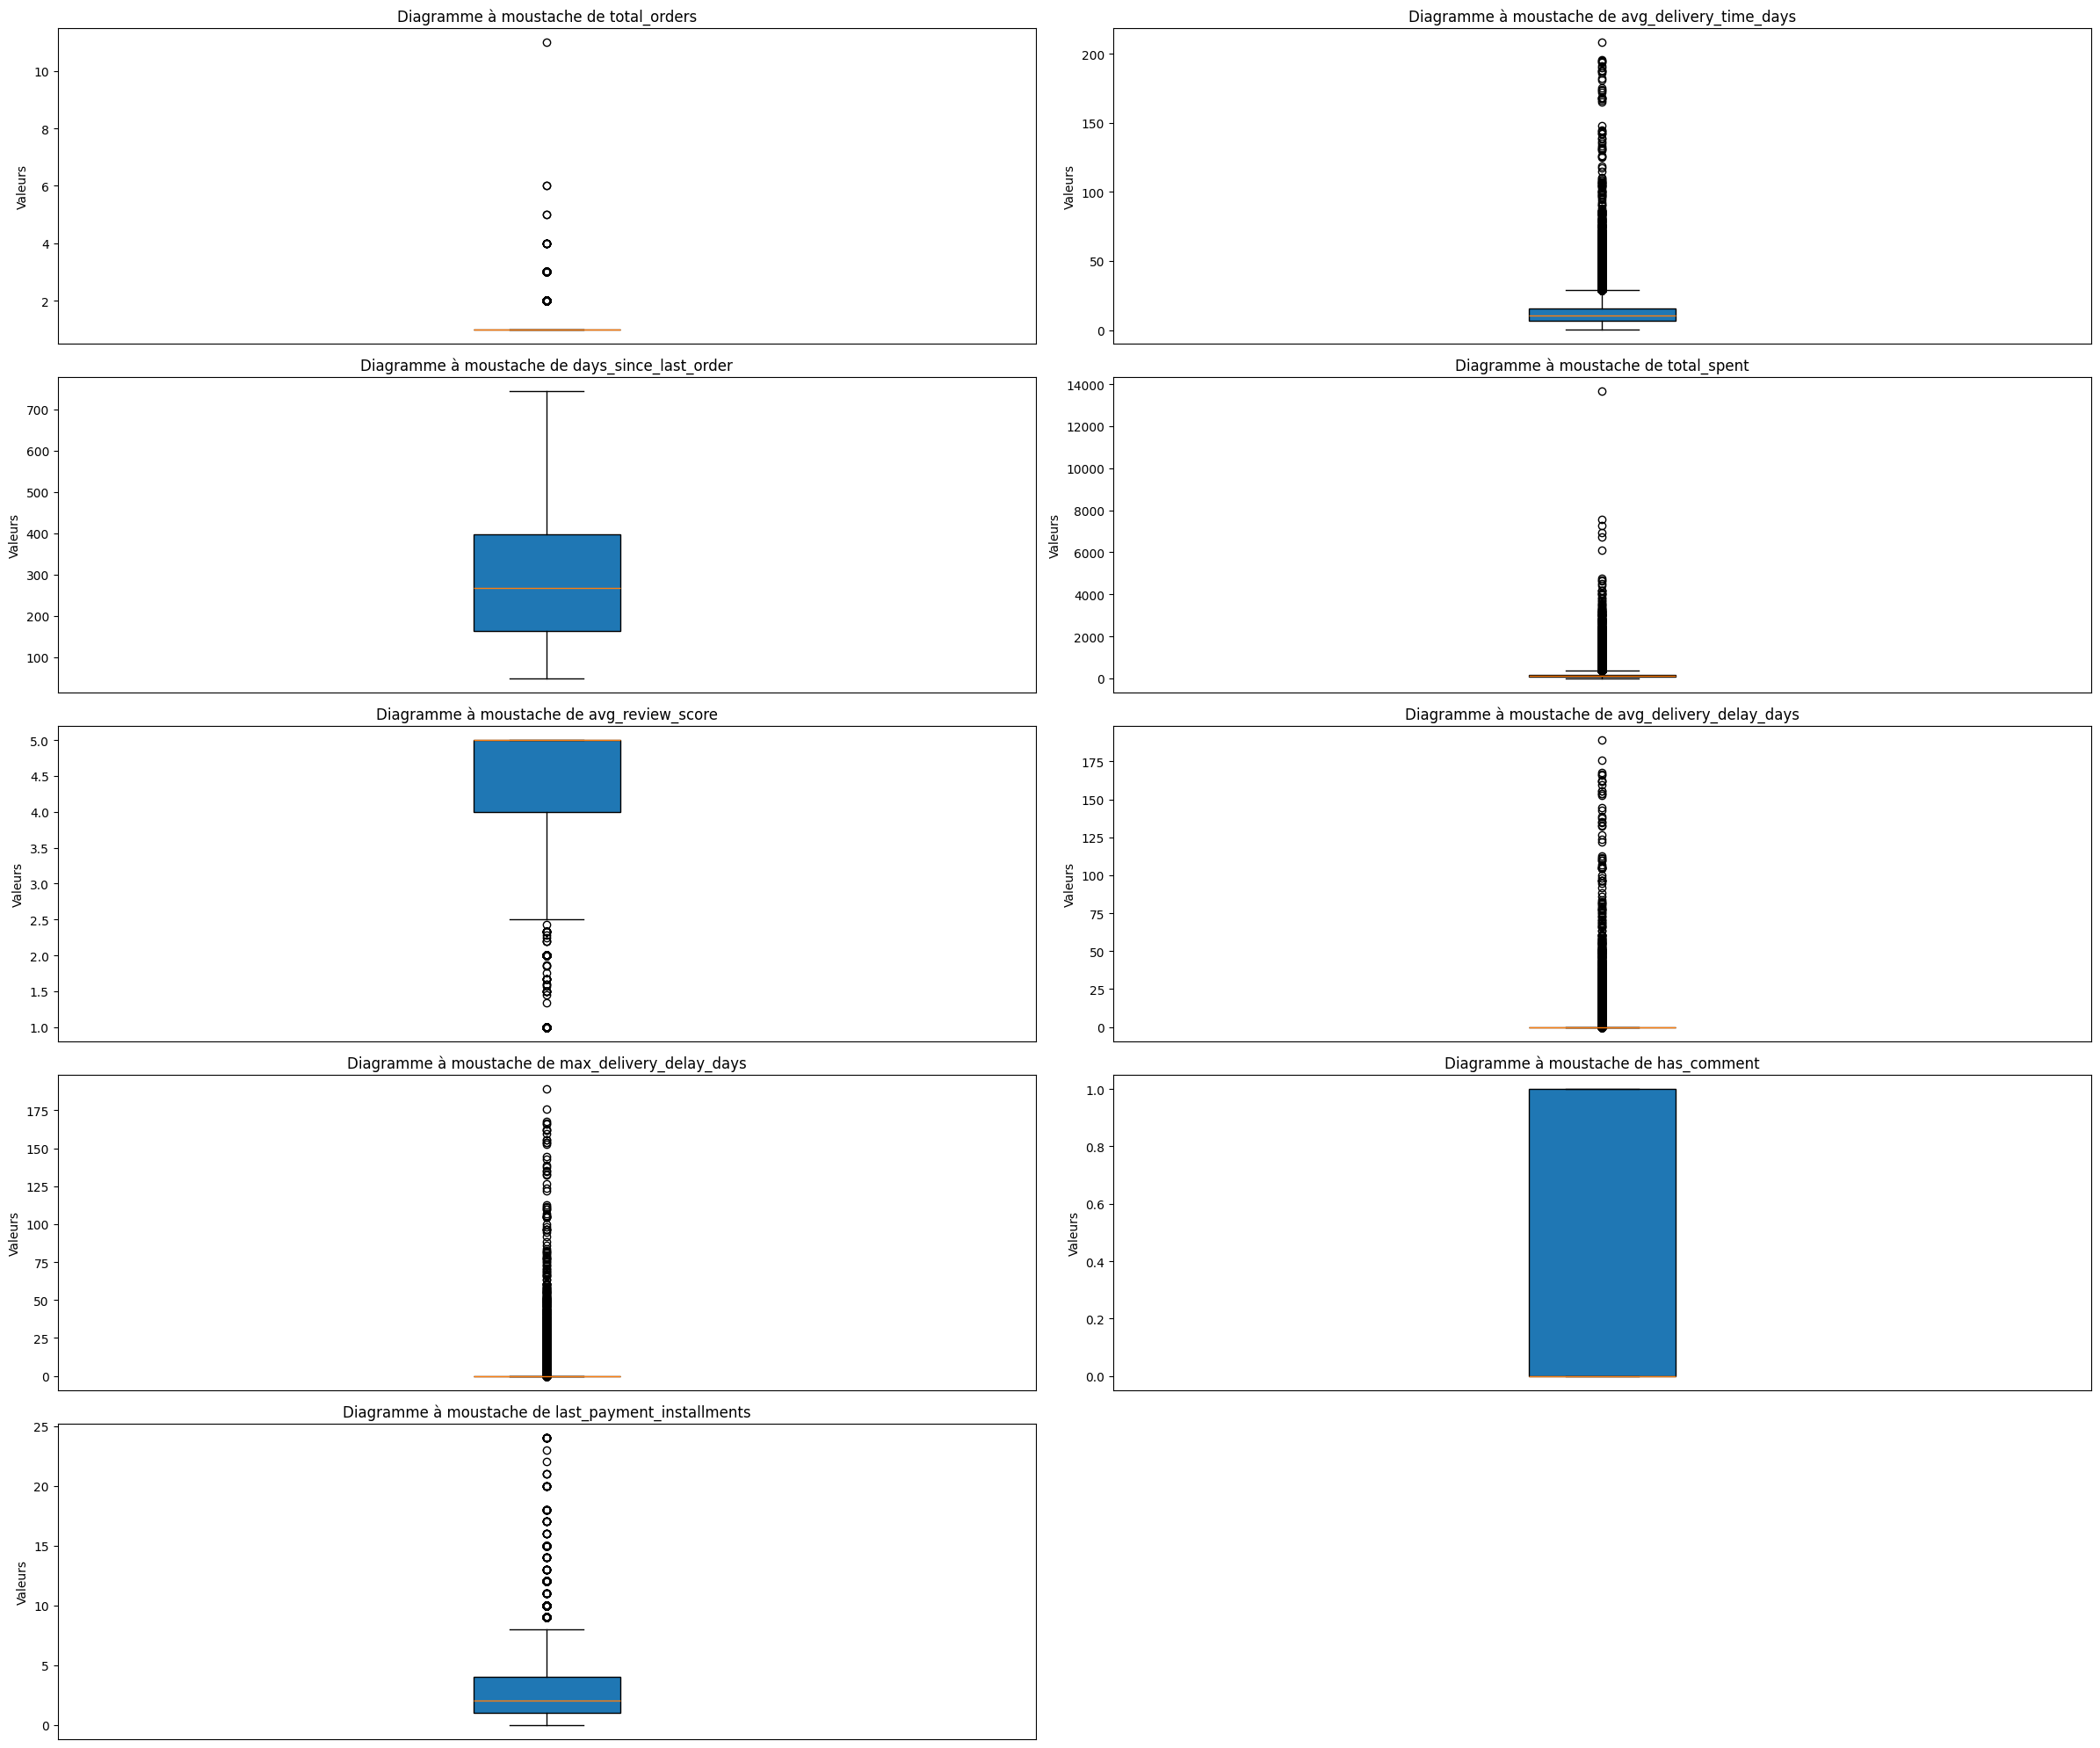

In [11]:
import matplotlib.pyplot as plt
import math

# Données pour le graphique
columns_to_plot = ['total_orders', 'avg_delivery_time_days', 'days_since_last_order',
       'total_spent', 'avg_review_score', 'avg_delivery_delay_days',
       'max_delivery_delay_days', 'has_comment', 'last_payment_installments']
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Calculer le nombre de lignes nécessaires
num_rows = math.ceil(len(columns_to_plot) / 2)

# Ajuster la taille de la figure
fig, axs = plt.subplots(num_rows, 2, figsize=(12*2, 4*num_rows))
axs = axs.ravel()

for idx, col in enumerate(columns_to_plot):
    axs[idx].boxplot(data_to_plot[idx], vert=True, patch_artist=True)
    axs[idx].set_title(f'Diagramme à moustache de {col}')
    axs[idx].set_ylabel('Valeurs')
    axs[idx].set_xticks([])

# Supprimer les axes non utilisés s'il y en a
for idx in range(len(columns_to_plot), num_rows*2):
    axs[idx].axis('off')

plt.tight_layout()
plt.show()


### Nous constatons que les valeurs des colonnes numériques sont bien réparties. Il n'y a pas de valeur aberrante ou incohérente.

In [12]:
# Créer un dataframe ne contenant que les colonnes de type number
df_num = df.select_dtypes(include=['number'])

In [13]:
correlation_matrix = df_num.corr()

# write correlation matrix to file
correlation_matrix.to_csv('data/correlation_matrix.csv')

print(correlation_matrix)

                           total_orders  avg_delivery_time_days  \
total_orders                   1.000000               -0.003090   
avg_delivery_time_days        -0.003090                1.000000   
days_since_last_order         -0.002097                0.098010   
total_spent                    0.101088                0.068762   
avg_review_score               0.001437               -0.334714   
avg_delivery_delay_days       -0.004909                0.703864   
max_delivery_delay_days        0.008854                0.703367   
has_comment                    0.019207                0.085079   
last_payment_installments     -0.017863                0.051280   

                           days_since_last_order  total_spent  \
total_orders                           -0.002097     0.101088   
avg_delivery_time_days                  0.098010     0.068762   
days_since_last_order                   1.000000    -0.001237   
total_spent                            -0.001237     1.000000   
avg_

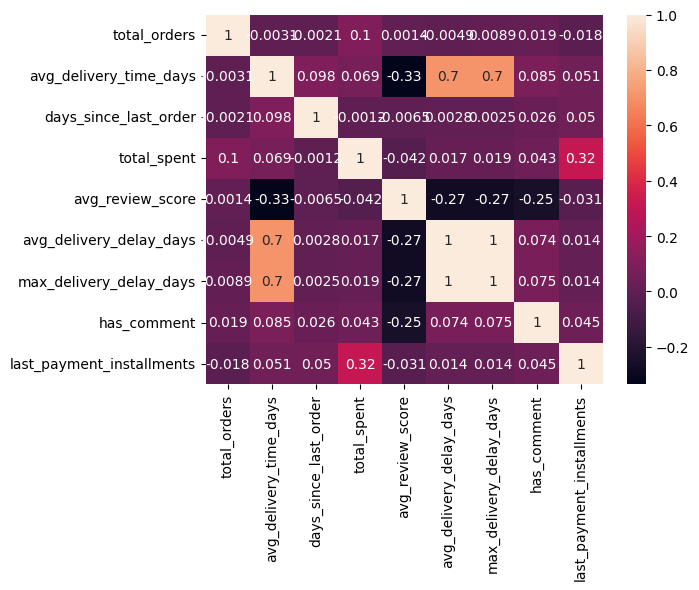

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Analyse des colonnes contenant des valeurs autres que des numbers

In [15]:
# create a dataframe with columns which are not number type
df_not_num = df.select_dtypes(exclude=['number'])

In [16]:
df_not_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94269 entries, 0 to 97077
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  94269 non-null  object
 1   last_order_status   94269 non-null  object
 2   last_payment_type   94269 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


In [17]:
df_not_num.sample(5)

,customer_unique_id,last_order_status,last_payment_type
83747,dc858be5b0bb881c067192937bf4ff78,delivered,boleto
3123,082c88e2e1a130417fc95d681d6a427b,delivered,debit_card
23079,3cba8ffcf762c735844f0cb07b0a0802,delivered,credit_card
87954,e7925fdb77dd57b021869b8a94bccee4,delivered,credit_card
71275,bbbc7054c34b03503b905cbea71f2684,delivered,credit_card


### La colonne unique id servira a identifier le client après segmentation.

## Génération du fichier csv clean pour les modèles de machine learning.

In [18]:
# write the resulting dataframe to a csv file
df.to_csv('data/clean.csv', index=False)

In [19]:
df.sample(10)

,customer_unique_id,total_orders,avg_delivery_time_days,days_since_last_order,total_spent,avg_review_score,avg_delivery_delay_days,max_delivery_delay_days,last_order_status,has_comment,last_payment_type,last_payment_installments
15292,28432b10d1f73d179c1b8cd72bb4c77b,1,9.083021,265.901412,272.20,4.0,0.00000,0.00000,delivered,1,credit_card,4.0
19379,32ff1dde3252a5ab192f8b8b52f64f44,1,8.787824,258.851505,84.79,5.0,0.00000,0.00000,delivered,0,credit_card,2.0
61884,a303d52a33f9b147dce5844929ec64ef,1,6.363218,84.440694,43.27,5.0,0.00000,0.00000,delivered,0,credit_card,4.0
18375,304dd6c8d344302772e0b825c0dbc462,1,27.244074,229.367176,35.84,5.0,3.64794,3.64794,delivered,0,boleto,1.0
17851,2ee27a6992275f12e9b8320102979055,1,8.198264,77.008785,42.87,4.0,0.00000,0.00000,delivered,0,credit_card,1.0
11015,1cdb1dcebe5ed59f11c7ddddb7f12a3e,1,14.809745,281.961609,75.17,4.0,0.00000,0.00000,delivered,1,boleto,1.0
27138,476067c2619e103d569ac1c3cde464cb,1,20.410116,315.223472,267.94,3.0,0.00000,0.00000,delivered,0,credit_card,10.0
33644,587cc63b7ae3f8d06895ea937c54db43,1,6.046910,180.002106,31.94,3.0,0.00000,0.00000,delivered,0,credit_card,1.0
24612,40c4c308279011b2e5b85c75579f415d,1,3.183646,484.401979,76.57,5.0,0.00000,0.00000,delivered,0,credit_card,1.0
4770,0c7b7ce4f8dc862f259a4eb3298d46d0,1,2.208345,590.296690,38.11,5.0,0.00000,0.00000,delivered,0,credit_card,1.0
